In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("airline_train.csv")
df.shape

(103904, 25)

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Handling Null Values and duplicate values

In [5]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
df.duplicated().sum()

0

In [5]:
# dropping null values
df.dropna(inplace=True)

### Checking data types of columns

In [9]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [6]:
# dropping columns - Unnamed: 0 and id
df.drop("Unnamed: 0",axis=1,inplace=True)
df.drop("id",axis=1,inplace=True)

In [7]:
# seperating categorical and continous columns
cat_cols = df.dtypes[df.dtypes=="object"].index
num_cols= df.dtypes[df.dtypes!="object"].index
print(cat_cols)
print(num_cols)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')
Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


In [8]:
# Checking dfferent categories in categorical columns
for i in cat_cols:
    print(f'Feature: {i}')
    print(f'Number of unique vales: {df[i].nunique()}')
    print('Value counts:\n',df[i].value_counts())
    print("***"*20)

Feature: Gender
Number of unique vales: 2
Value counts:
 Female    52576
Male      51018
Name: Gender, dtype: int64
************************************************************
Feature: Customer Type
Number of unique vales: 2
Value counts:
 Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64
************************************************************
Feature: Type of Travel
Number of unique vales: 2
Value counts:
 Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64
************************************************************
Feature: Class
Number of unique vales: 3
Value counts:
 Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64
************************************************************
Feature: satisfaction
Number of unique vales: 2
Value counts:
 neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64
****************************************

In [18]:
# Checking the numerical columns
for i in num_cols:
    print(f'Feature: {i}')
    print(f'Number of unique vales: {df[i].nunique()}')
    print("***"*20)    

Feature: Age
Number of unique vales: 75
************************************************************
Feature: Flight Distance
Number of unique vales: 3802
************************************************************
Feature: Inflight wifi service
Number of unique vales: 6
************************************************************
Feature: Departure/Arrival time convenient
Number of unique vales: 6
************************************************************
Feature: Ease of Online booking
Number of unique vales: 6
************************************************************
Feature: Gate location
Number of unique vales: 6
************************************************************
Feature: Food and drink
Number of unique vales: 6
************************************************************
Feature: Online boarding
Number of unique vales: 6
************************************************************
Feature: Seat comfort
Number of unique vales: 6
************************************

In [ ]:
# Even though few numerical columns have integer/float values still they are categorical.
# Only continous columns are : "Arrival Delay in Minutes","Departure Delay in Minutes","Flight Distance","Age"

In [9]:
cont_cols=["Arrival Delay in Minutes","Departure Delay in Minutes","Flight Distance","Age"]

# EDA

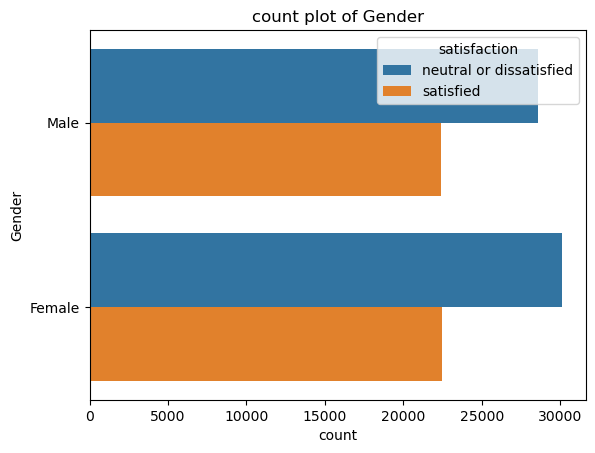

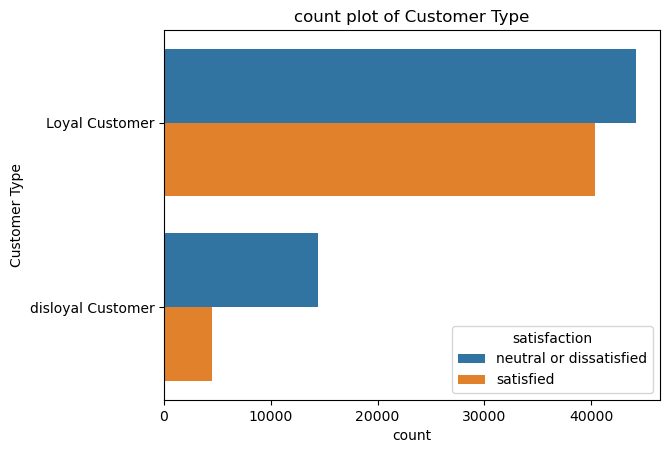

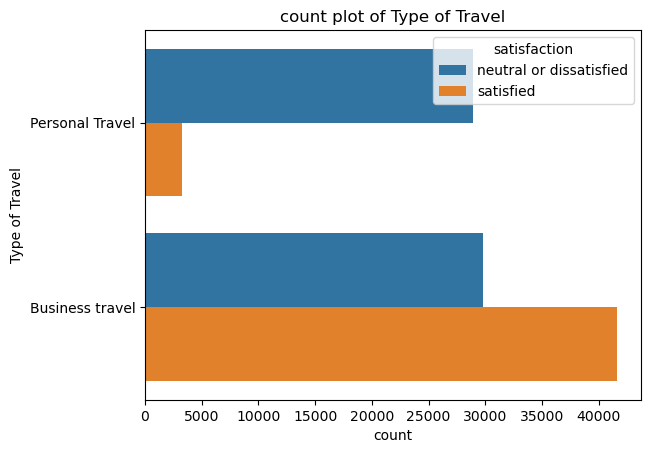

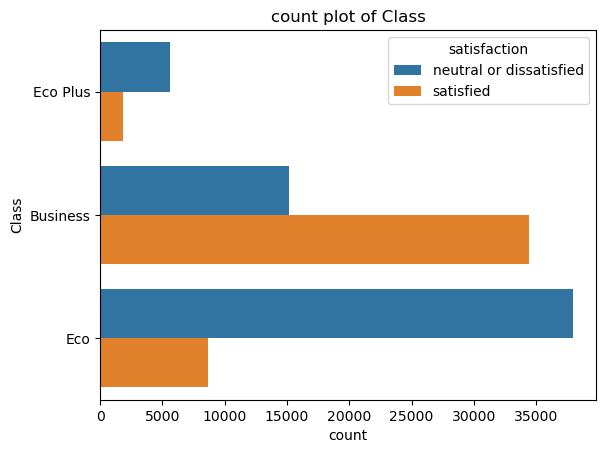

In [10]:
# Generating insights from categorical columns by comparing them with target variable(satisfaction)
for i in cat_cols[:-1]:
    sns.countplot(y=df[i],hue=df["satisfaction"])
    plt.title(f'count plot of {i}')
    plt.show()

## Inference 
<pre>
-- Loyal customers are more likely to be satisfied.
-- Those who are travellig for business purpose are more likely to be satisfied.
-- customers in Economic class are more likely to be unsatisfied.
<pre>

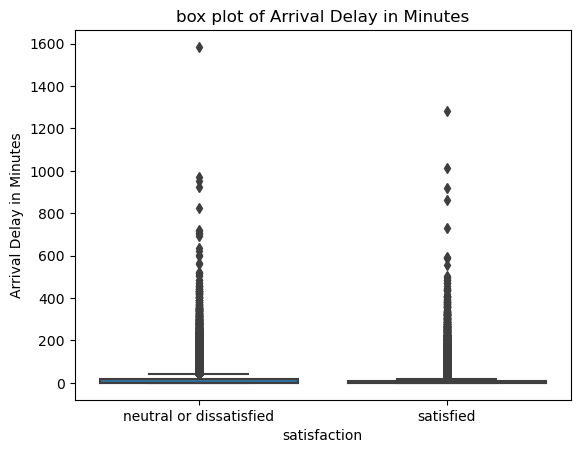

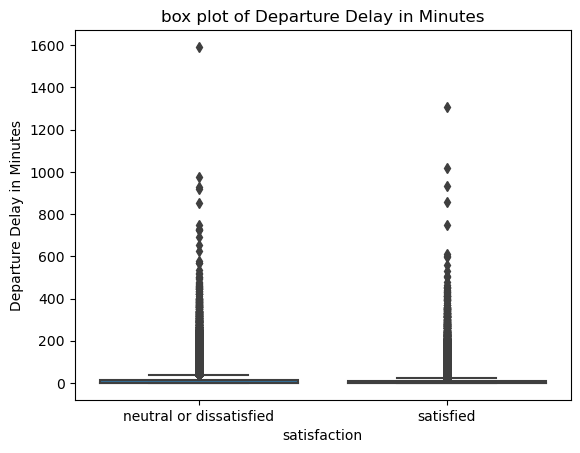

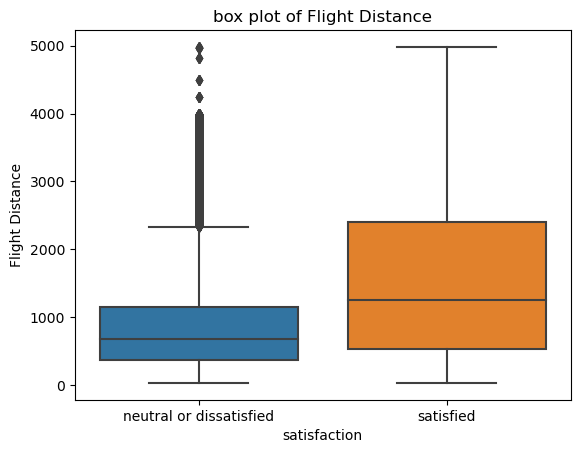

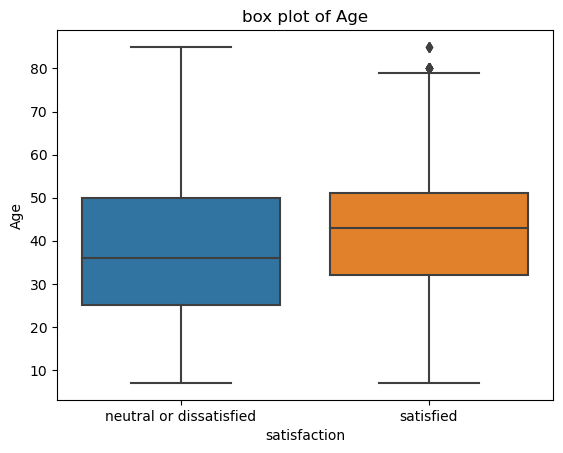

In [11]:
# Generating insights for continous columns.
for i in cont_cols:
    sns.boxplot(y=df[i],x=df["satisfaction"])
    plt.title(f'box plot of {i}')
    plt.show()

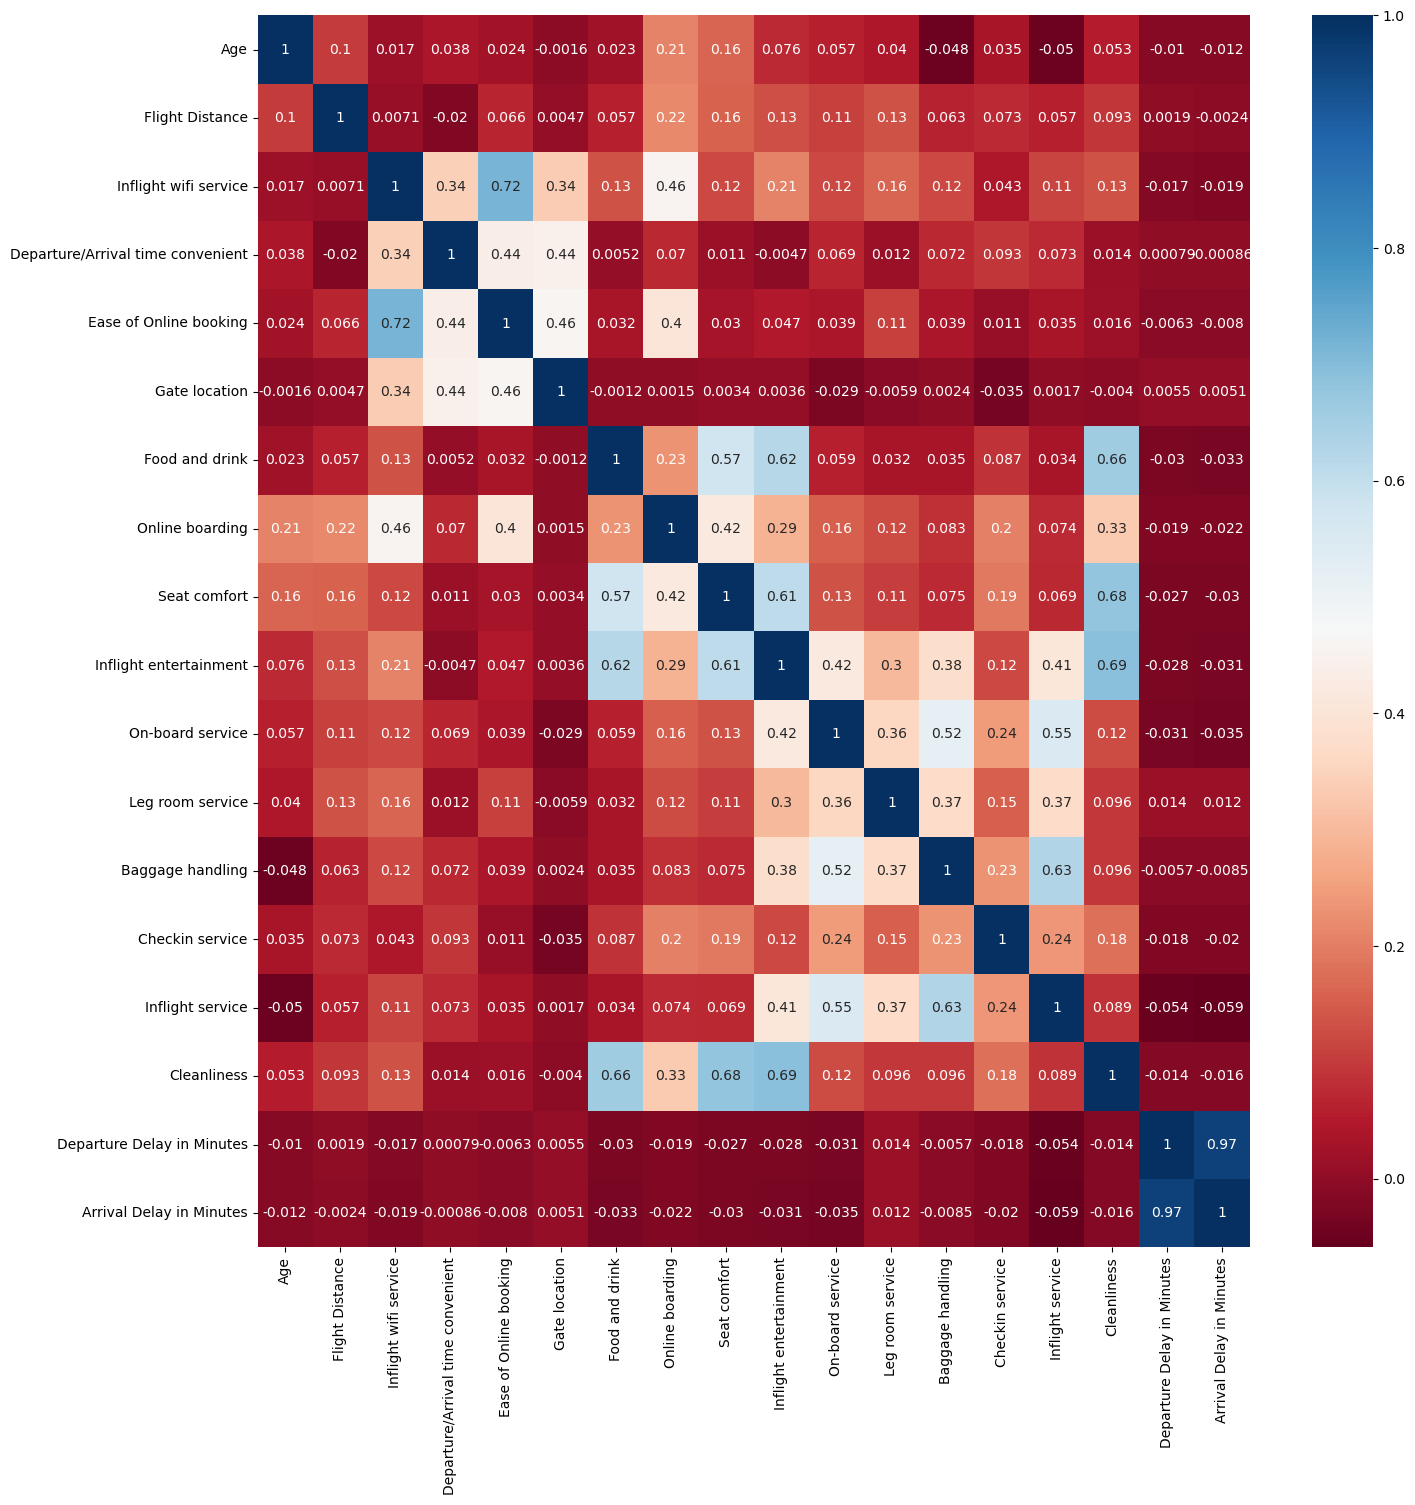

In [12]:
# Checking correlation between independent features.
corr = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True,cmap="RdBu")
plt.show()

## Inference 
<pre>
-- Highly correlated features are :
   - Departure delay in minutes and arival delay in minutes.
   - Inflight wifi services and ease of online booking.
   - cleanliness with food and drink,seat comfort,inflight entertainment.
<pre>

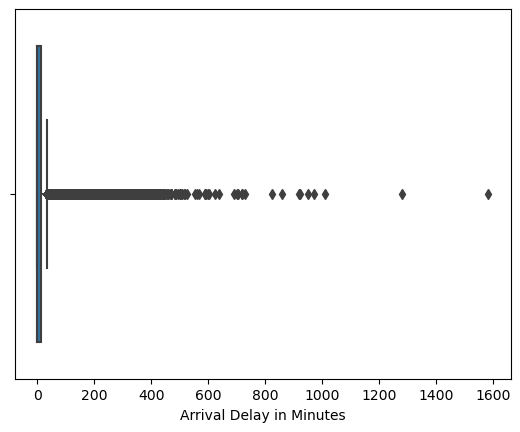

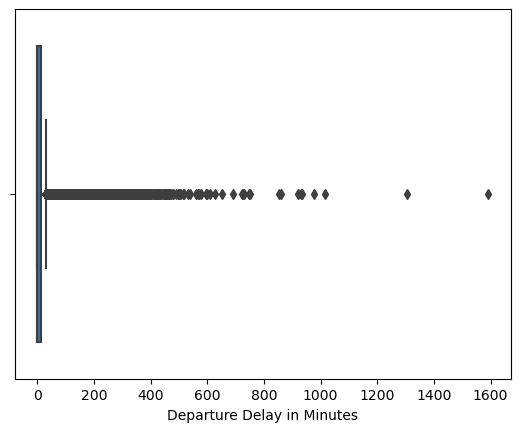

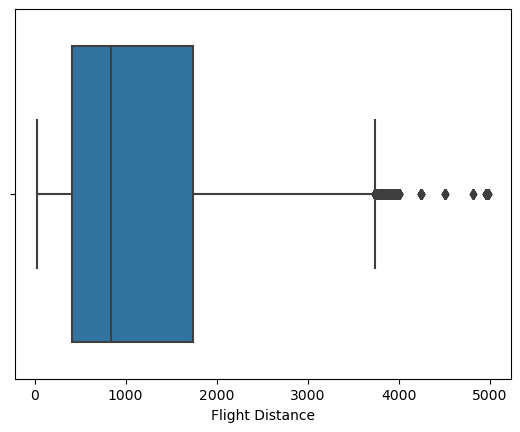

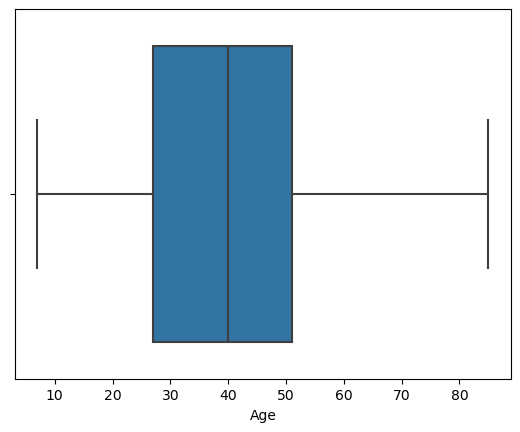

In [13]:
# checking outlier usning boxplot.
for i in cont_cols:
    sns.boxplot(x=df[i])
    plt.show()

## Inference 
<pre>
-- No outliers in Age column.
-- Arival delay in minutes, departure delay in minutes and flight distance.
<pre>

In [14]:
## Seperating outliers from original data.
df1=df.copy()

In [15]:
df[["Arrival Delay in Minutes","Departure Delay in Minutes","Flight Distance"]].describe(percentiles=[0.6,0.7,0.8,0.85,0.88,0.89,0.9,0.94,0.95,0.98]).T

,count,mean,std,min,50%,60%,70%,80%,85%,88%,89%,90%,94%,95%,98%,max
Arrival Delay in Minutes,103594.0,15.178678,38.698682,0.0,0.0,2.0,9.0,19.0,28.0,37.0,40.0,44.0,69.0,79.0,136.0,1584.0
Departure Delay in Minutes,103594.0,14.747939,38.116737,0.0,0.0,2.0,8.0,19.0,28.0,36.0,40.0,44.0,68.0,77.0,134.0,1592.0
Flight Distance,103594.0,1189.325202,997.297235,31.0,842.0,1050.0,1512.0,2065.0,2413.0,2586.0,2651.0,2751.0,3256.0,3384.0,3764.0,4983.0


## Encoding columns with data type- object

In [16]:

df["Gender"].value_counts()
df["Gender"]=df["Gender"].replace({"Female":0,"Male":1})

In [17]:
df["Customer Type"].value_counts()
df["Customer Type"]=df["Customer Type"].replace({"disloyal Customer":0,"Loyal Customer":1})

In [18]:
df_dum = pd.get_dummies(data = df,columns=["Type of Travel","Class"])

In [21]:
print(df_dum.shape)
df_dum.columns

(103594, 26)


Index(['Gender', 'Customer Type', 'Age', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')

#### checking whether the data is imbalanced or not

In [20]:
df_dum["satisfaction"].value_counts(normalize=True)
# not imbalanced

neutral or dissatisfied    0.566606
satisfied                  0.433394
Name: satisfaction, dtype: float64

# Seperating dependent and independent features.

In [22]:
x= df_dum.drop("satisfaction",axis=1)
y= df_dum["satisfaction"]

In [23]:
#  Splitting the data
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                random_state=0)
print(x_train.shape)
print(x_test.shape)

(72515, 25)
(31079, 25)


## Outlier Treatment using RobustScaler

In [26]:
from sklearn.preprocessing import RobustScaler

In [27]:
scaler = RobustScaler()
scaler.fit(x_train)
x_train1 = scaler.transform(x_train)
x_test1 = scaler.transform(x_test)

### Create Function to compute Confusion Matrix, Classification Report

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [34]:
def eval_model(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

In [35]:
def model_metrics(model,x_train,x_test,y_train,y_test):  # model = instance of model
    model.fit(x_train,y_train)
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    print('Training score',train_scr)
    print('Testing score',test_scr)
    ypred = model.predict(x_test)
    print('Predictions\n',ypred)
    eval_model(y_test,ypred)
    res = {'Train_Score':train_scr,'Test_Score':test_scr}
    return res

### Model 1

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [37]:
dt1 = DecisionTreeClassifier(random_state=20)  # criterion='gini'
dt1_res = model_metrics(dt1,x_train,x_test,y_train,y_test)

Training score 1.0
Testing score 0.9447536922037388
Predictions
 ['satisfied' 'satisfied' 'neutral or dissatisfied' ...
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied']
Confusion Matrix
 [[16723   858]
 [  859 12639]]
Classification Report
                          precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     17581
              satisfied       0.94      0.94      0.94     13498

               accuracy                           0.94     31079
              macro avg       0.94      0.94      0.94     31079
           weighted avg       0.94      0.94      0.94     31079



In [38]:
print(dt1_res)

{'Train_Score': 1.0, 'Test_Score': 0.9447536922037388}


In [39]:
base_model = pd.DataFrame(dt1_res,index=['DT(Base Model)'])
base_model

,Train_Score,Test_Score
DT(Base Model),1.0,0.944754


In [42]:
fn = x_train.columns
cn = ["satisfied","dissatisfied"]

### To plot the Decision Tree

In [59]:
# plt.figure(figsize=(16,16))
# plot_tree(dt1,feature_names=fn,class_names=cn,filled=True)
# plt.show()

### Model 2

In [45]:
from sklearn.model_selection import cross_val_score,KFold

In [46]:
md = [4,5,6,7,8,9]
mss = [10,12,14,17,20,22,25]
kf = KFold(n_splits=7)
for i in md:
    for j in mss:
        scores = cross_val_score(DecisionTreeClassifier(max_depth=i,min_samples_split=j),
                                 x_train1,y_train,cv=kf,scoring='accuracy')
        print(f'Avg _Score at max_depth {i} and min_samples_split {j} is {scores.mean()}')

Avg _Score at max_depth 4 and min_samples_split 10 is 0.8889195464192362
Avg _Score at max_depth 4 and min_samples_split 12 is 0.8889195464192362
Avg _Score at max_depth 4 and min_samples_split 14 is 0.8889195464192362
Avg _Score at max_depth 4 and min_samples_split 17 is 0.8889195464192362
Avg _Score at max_depth 4 and min_samples_split 20 is 0.8889195464192362
Avg _Score at max_depth 4 and min_samples_split 22 is 0.8889195464192362
Avg _Score at max_depth 4 and min_samples_split 25 is 0.8889195464192362
Avg _Score at max_depth 5 and min_samples_split 10 is 0.9047645231181286
Avg _Score at max_depth 5 and min_samples_split 12 is 0.9047645231181286
Avg _Score at max_depth 5 and min_samples_split 14 is 0.9047645231181286
Avg _Score at max_depth 5 and min_samples_split 17 is 0.9047645231181286
Avg _Score at max_depth 5 and min_samples_split 20 is 0.9047645231181286
Avg _Score at max_depth 5 and min_samples_split 22 is 0.9047645231181286
Avg _Score at max_depth 5 and min_samples_split 25 

In [48]:
dt2 = DecisionTreeClassifier(random_state=20,max_depth=9,min_samples_split=20)  # criterion='gini'
dt2_res = model_metrics(dt2,x_train1,x_test1,y_train,y_test)

Training score 0.9444390815693304
Testing score 0.9392837607387625
Predictions
 ['satisfied' 'satisfied' 'neutral or dissatisfied' ...
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied']
Confusion Matrix
 [[17037   544]
 [ 1343 12155]]
Classification Report
                          precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.97      0.95     17581
              satisfied       0.96      0.90      0.93     13498

               accuracy                           0.94     31079
              macro avg       0.94      0.93      0.94     31079
           weighted avg       0.94      0.94      0.94     31079



In [49]:
model2 = pd.DataFrame(dt2_res,index=['DT(with pruning)'])
model2

,Train_Score,Test_Score
DT(with pruning),0.944439,0.939284


In [50]:
base_model = pd.concat([base_model,model2])

In [51]:
base_model

,Train_Score,Test_Score
DT(Base Model),1.000000,0.944754
DT(with pruning),0.944439,0.939284


### Model 3 using RandomizedSearchCV

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
hparams_dt = {'criterion':['gini','entropy'],
             'max_depth':list(range(4,12)),
             'min_samples_split':[8,10,12,14,15,17,20,22,24]}

In [54]:
bmodel = DecisionTreeClassifier()
kf = KFold(n_splits=5)
rs1 = RandomizedSearchCV(estimator=bmodel,param_distributions=hparams_dt,
                         cv=kf, scoring='accuracy') 
rs1.fit(x_train1,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                                        'min_samples_split': [8, 10, 12, 14, 15,
                                                              17, 20, 22, 24]},
                   scoring='accuracy')

In [55]:
print('Train Score',rs1.score(x_train1,y_train))
print('Test Score',rs1.score(x_test1,y_test))
print('Best Hyperparamters')
print(rs1.best_params_)
print(rs1.best_estimator_)

Train Score 0.9566572433289664
Test Score 0.9485826442292223
Best Hyperparamters
{'min_samples_split': 8, 'max_depth': 11, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=11, min_samples_split=8)


In [56]:
rs_based_model = DecisionTreeClassifier(**rs1.best_params_)
rs_based_res = model_metrics(rs_based_model,x_train1,x_test1,y_train,y_test)

Training score 0.9566986140798456
Testing score 0.9484861160268991
Predictions
 ['satisfied' 'satisfied' 'neutral or dissatisfied' ...
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied']
Confusion Matrix
 [[17091   490]
 [ 1111 12387]]
Classification Report
                          precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.97      0.96     17581
              satisfied       0.96      0.92      0.94     13498

               accuracy                           0.95     31079
              macro avg       0.95      0.94      0.95     31079
           weighted avg       0.95      0.95      0.95     31079



In [57]:
rs_model = pd.DataFrame(rs_based_res,index=['RandomizedSearchCV with DT'])

,Train_Score,Test_Score
RandomizedSearchCV with DT,0.956699,0.948486


In [58]:
result = pd.concat([base_model,rs_model])
result

,Train_Score,Test_Score
DT(Base Model),1.000000,0.944754
DT(with pruning),0.944439,0.939284
RandomizedSearchCV with DT,0.956699,0.948486
